In [4]:
# === Imports ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Data Loading ===
df = pd.read_csv("../data/cleaned/telco_churn_clean.csv")


## 1. Churn Rate by Contract Type


## Key Churn Insights

- Customers in their first 12 months show the highest churn rates.
- Month-to-month contracts have significantly higher churn across all tenure groups.
- Long-term contracts (1-year and 2-year) drastically reduce churn, even for new customers.
- Tenure and contract type together are the strongest churn predictors.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/cleaned/telco_churn_clean.csv")

print("Shape:", df.shape)
print("Churn rate (%):", round(df["Churn"].mean() * 100, 2))
df.head()


Matplotlib is building the font cache; this may take a moment.


Shape: (7032, 20)
Churn rate (%): 26.58


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [2]:
churn_by_contract = (
    df.groupby("Contract")["Churn"]
      .mean()
      .sort_values(ascending=False) * 100
)

churn_by_contract


Contract
Month-to-month    42.709677
One year          11.277174
Two year           2.848665
Name: Churn, dtype: float64

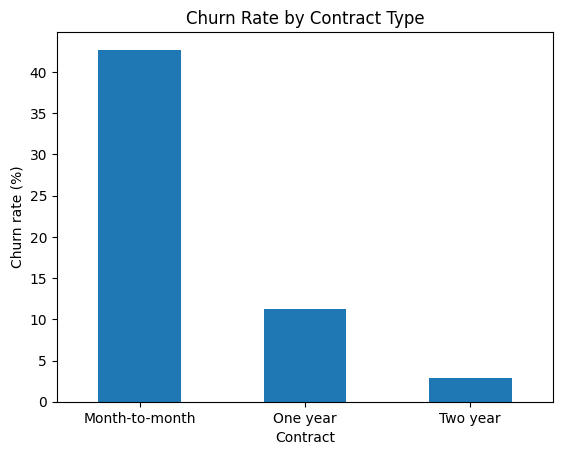

In [3]:
ax = churn_by_contract.plot(kind="bar")
ax.set_ylabel("Churn rate (%)")
ax.set_title("Churn Rate by Contract Type")
plt.xticks(rotation=0)
plt.show()


In [4]:
# Create tenure groups
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0–12 months", "12–24 months", "24–48 months", "48–72 months"]
)

df["tenure_group"].value_counts().sort_index()


tenure_group
0–12 months     2175
12–24 months    1024
24–48 months    1594
48–72 months    2239
Name: count, dtype: int64

In [6]:
churn_by_tenure = (
    df.groupby("tenure_group", observed=False)["Churn"]
      .mean()
      .sort_values(ascending=False) * 100
)
churn_by_tenure


tenure_group
0–12 months     47.678161
12–24 months    28.710938
24–48 months    20.388959
48–72 months     9.513176
Name: Churn, dtype: float64

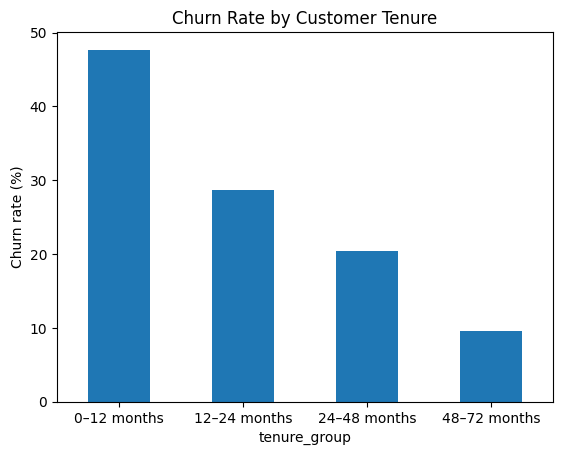

In [7]:
ax = churn_by_tenure.sort_index().plot(kind="bar")
ax.set_ylabel("Churn rate (%)")
ax.set_title("Churn Rate by Customer Tenure")
plt.xticks(rotation=0)
plt.show()


In [8]:
pivot = pd.pivot_table(
    df,
    values="Churn",
    index="tenure_group",
    columns="Contract",
    aggfunc="mean",
    observed=False
) * 100

pivot.round(2)


Contract,Month-to-month,One year,Two year
tenure_group,,,
0–12 months,51.35,10.57,0.00
12–24 months,37.72,8.12,0.00
24–48 months,32.92,10.62,2.19
48–72 months,26.02,12.93,3.33


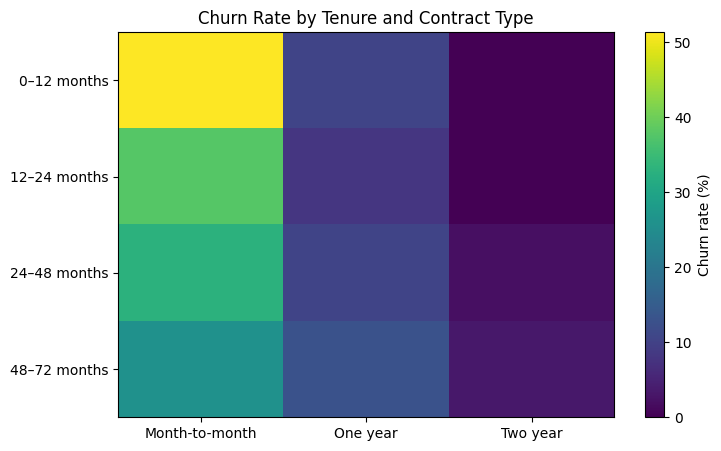

In [9]:
plt.figure(figsize=(8,5))
plt.imshow(pivot, aspect="auto")
plt.colorbar(label="Churn rate (%)")
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.title("Churn Rate by Tenure and Contract Type")
plt.show()


In [10]:
# Churn by Internet Service
internet_churn = (
    df.groupby("InternetService")["Churn"]
    .mean()
    .sort_values(ascending=False) * 100
)

internet_churn


InternetService
Fiber optic    41.892765
DSL            18.998344
No              7.434211
Name: Churn, dtype: float64

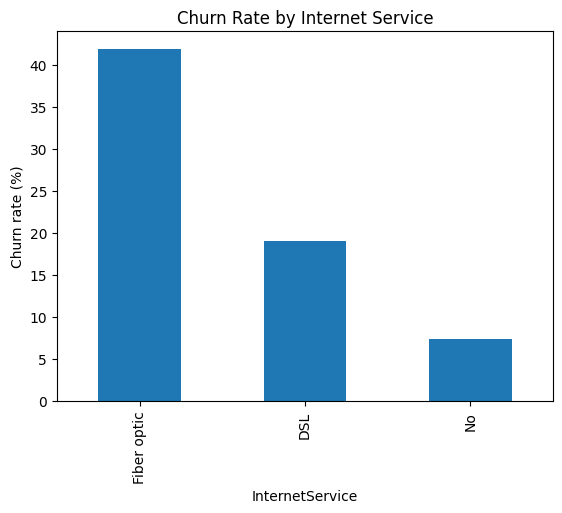

In [11]:
internet_churn.plot(kind="bar", title="Churn Rate by Internet Service", ylabel="Churn rate (%)")
plt.show()


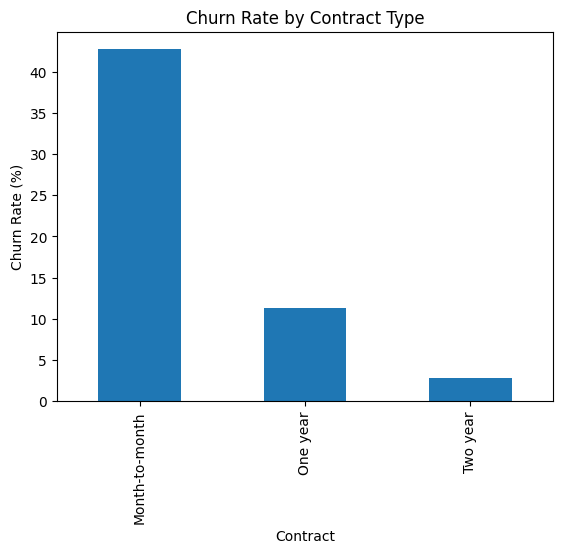

In [3]:
contract_churn = df.groupby("Contract")["Churn"].mean() * 100

plt.figure()
contract_churn.plot(kind="bar")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Contract Type")
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("../data/cleaned/telco_churn_clean.csv")

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [5]:
df.shape
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


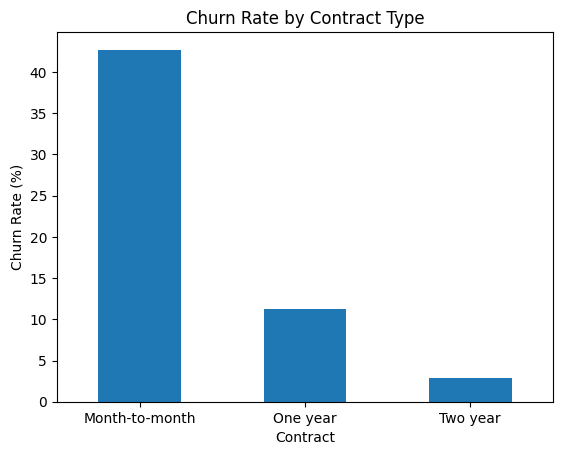

In [7]:
contract_churn = df.groupby("Contract")["Churn"].mean() * 100

plt.figure()
contract_churn.plot(kind="bar")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Contract Type")
plt.xticks(rotation=0)
plt.show()


<Figure size 640x480 with 0 Axes>

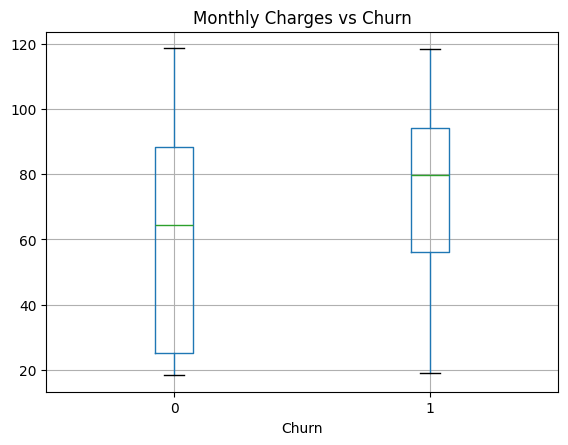

In [8]:
plt.figure()
df.boxplot(column="MonthlyCharges", by="Churn")
plt.title("Monthly Charges vs Churn")
plt.suptitle("")
plt.show()


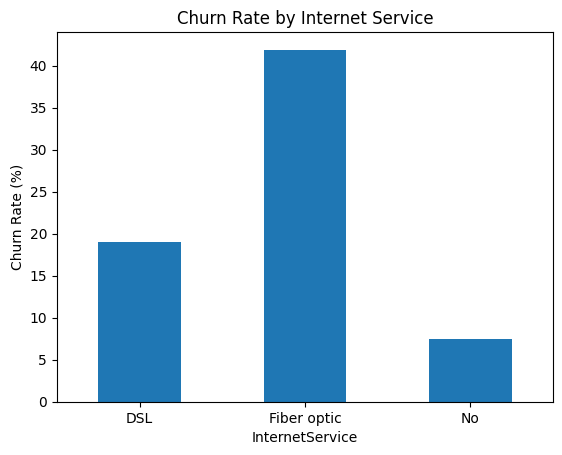

In [9]:
internet_churn = df.groupby("InternetService")["Churn"].mean() * 100

plt.figure()
internet_churn.plot(kind="bar")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Internet Service")
plt.xticks(rotation=0)
plt.show()


Insight: Customers on month-to-month contracts churn significantly more than long-term contracts, suggesting retention improves with contract commitment.